In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d

import ipywidgets as widgets

In [3]:
# If widgets are not rendering or interactivity is not working
# https://github.com/jupyterlab/jupyterlab/issues/12580

In [215]:
class InteractivePlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

        # Enable interactive features
        %matplotlib widget

    def plot_3d_line(self, columns_to_include=None, add_average=False, scale_factor=None, growth_rate = None, show_original=False, years_subset=None):
        """
        Generate a 3D line plot of time series data.

        Parameters:
        - columns_to_include: list, optional
            List of column names to include in the plot. If None, all columns in the dataframe are included.
        - add_average: bool, optional
            If True, add a line for the average value of each column.
        - scale_factor: float, optional
            Factor to scale the values by. If None, no scaling is applied.
        - growth_rate: float, optional
            Compound growth rate to apply to the values. If provided, a growth rate line is added to the plot.
        - show_original: bool, optional
            If True, show the original values in addition to any scaled or growth rate values.
        - years_subset: list, optional
            List of years to include in the plot. If None, all years in the dataframe are included.

        Returns:
        None
        """
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        for i, column in enumerate(columns_to_include):
            if column in self.dataframe.columns:
                values = self.dataframe[column].loc[years_subset].values

                if show_original:
                    ax.plot(years_subset, np.full_like(years_subset, i), values, label=f'{column} Original', linestyle='-', color='green')

                if growth_rate is not None:
                    t = np.arange(len(years_subset))
                    growth_values = values * (1 + growth_rate) ** t
                    ax.plot(years_subset, np.full_like(years_subset, i), growth_values, linestyle='-', color='orange') #label=f'{column} Growth Rate'

                if scale_factor is not None:
                    scaled_values = values * scale_factor
                    ax.plot(years_subset, np.full_like(years_subset, i), scaled_values, linestyle='-', color='blue') #label=f'{column} Scaled'

                if add_average:
                    average_value = values.mean()
                    ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='black') #label=f'{column} Average'

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Line Plot of Time Series Data')

        # Set y-axis ticks and labels using column names
        ax.set_yticks(np.arange(len(columns_to_include)))
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()

    def plot_3d_bar(self, columns_to_include=None, scale_factor=None, show_original=False, years_subset=None, growth_rate=None):
        """
        Generate a 3D bar chart of time series data.

        Parameters:
        - columns_to_include: list, optional
            List of column names to include in the plot. If None, all columns in the dataframe are included.
        - scale_factor: float, optional
            Factor to scale the values by. If None, no scaling is applied.
        - show_original: bool, optional
            If True, show the original values in addition to any scaled or growth rate values.
        - years_subset: list, optional
            List of years to include in the plot. If None, all years in the dataframe are included.
        - growth_rate: float, optional
            Compound growth rate to apply to the values. If provided, a growth rate bar is added to the plot.

        Returns:
        None
        """
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        values = np.array(self.dataframe[columns_to_include].loc[years_subset].values)

        xpos, ypos = np.meshgrid(range(len(years_subset)), range(len(columns_to_include)), indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = np.zeros_like(xpos)

        dx = dy = 0.4  # Adjust the width of the bars
        dz_original = values.ravel()

        if growth_rate is not None:
            t = np.arange(len(years_subset))
            growth_values = values * (1 + growth_rate) ** t[:, np.newaxis]
            dz_growth = growth_values.ravel()

            colors_growth = cm.Paired(np.linspace(0, 1, len(columns_to_include)))

            for i, (column, color_growth) in enumerate(zip(columns_to_include, colors_growth)):
                ax.bar3d(xpos[i::len(columns_to_include)], ypos[i::len(columns_to_include)] + dy, zpos[i::len(columns_to_include)], dx, dy, dz_growth[i::len(columns_to_include)], shade=True, color=color_growth, label=f'{column} Growth Rate')

        if scale_factor is not None:
            dz_scaled = values.ravel() * scale_factor
            colors_scaled = cm.Dark2(np.linspace(0, 1, len(columns_to_include)))

            for i, (column, color_scaled) in enumerate(zip(columns_to_include, colors_scaled)):
                ax.bar3d(xpos[i::len(columns_to_include)], ypos[i::len(columns_to_include)] + dy, zpos[i::len(columns_to_include)], dx, dy, dz_scaled[i::len(columns_to_include)], shade=True, color=color_scaled, label=f'{column} Scaled')

        colors_original = cm.viridis(np.linspace(0, 1, len(columns_to_include)))

        for i, (column, color_original) in enumerate(zip(columns_to_include, colors_original)):
            ax.bar3d(xpos[i::len(columns_to_include)], ypos[i::len(columns_to_include)], zpos[i::len(columns_to_include)], dx, dy, dz_original[i::len(columns_to_include)], shade=True, color=color_original, label=f'{column} Original')

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Bar Chart of Time Series Data')

        ax.set_xticks(np.arange(len(years_subset)) + 0.4)
        ax.set_xticklabels(years_subset)
        ax.set_yticks(np.arange(len(columns_to_include)) + 0.4)
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()

    def plot_3d_stem(self, columns_to_include=None, add_average=False, scale_factor=None, show_original=False, years_subset=None, growth_rate=None):
        """
        Generate a 3D stem plot of time series data.

        Parameters:
        - columns_to_include: list, optional
            List of column names to include in the plot. If None, all columns in the dataframe are included.
        - add_average: bool, optional
            If True, add a line for the average value of each column.
        - scale_factor: float, optional
            Factor to scale the values by. If None, no scaling is applied.
        - show_original: bool, optional
            If True, show the original values in addition to any scaled or averaged values.
        - years_subset: list, optional
            List of years to include in the plot. If None, all years in the dataframe are included.
        - growth_rate: float, optional
            Compound growth rate to apply to the values. If provided, a growth rate line is added to the plot.

        Returns:
        None
        """
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        if years_subset is None:
            years_subset = self.dataframe.index

        if columns_to_include is None:
            columns_to_include = self.dataframe.columns

        for i, column in enumerate(columns_to_include):
            if column in self.dataframe.columns:
                values = self.dataframe[column].loc[years_subset].values

                if growth_rate is not None:
                    t = np.arange(len(years_subset))
                    growth_values = values * (1 + growth_rate) ** t
                    ax.stem(years_subset, np.full_like(years_subset, i), growth_values, label=f'{column} Growth Rate', basefmt='k-', linefmt='--', markerfmt='o')

                if show_original:
                    ax.stem(years_subset, np.full_like(years_subset, i), values, label=f'{column} Original', basefmt='k-', linefmt='--', markerfmt='o')

                if scale_factor is not None:
                    scaled_values = values * scale_factor
                    ax.plot(years_subset, np.full_like(years_subset, i), scaled_values, label=f'{column} Scaled', linestyle='-', color='blue', marker='o')

                if add_average:
                    average_value = values.mean()
                    ax.plot(years_subset, np.full_like(years_subset, i), np.full_like(years_subset, average_value), linestyle='--', color='red', label=f'{column} Average')

        ax.set_xlabel('Year')
        ax.set_ylabel('Columns')
        ax.set_zlabel('Values')
        ax.set_title('3D Stem Plot of Time Series Data')

        # Set y-axis ticks and labels using column names
        ax.set_yticks(np.arange(len(columns_to_include)))
        ax.set_yticklabels(columns_to_include)

        ax.legend()
        plt.show()



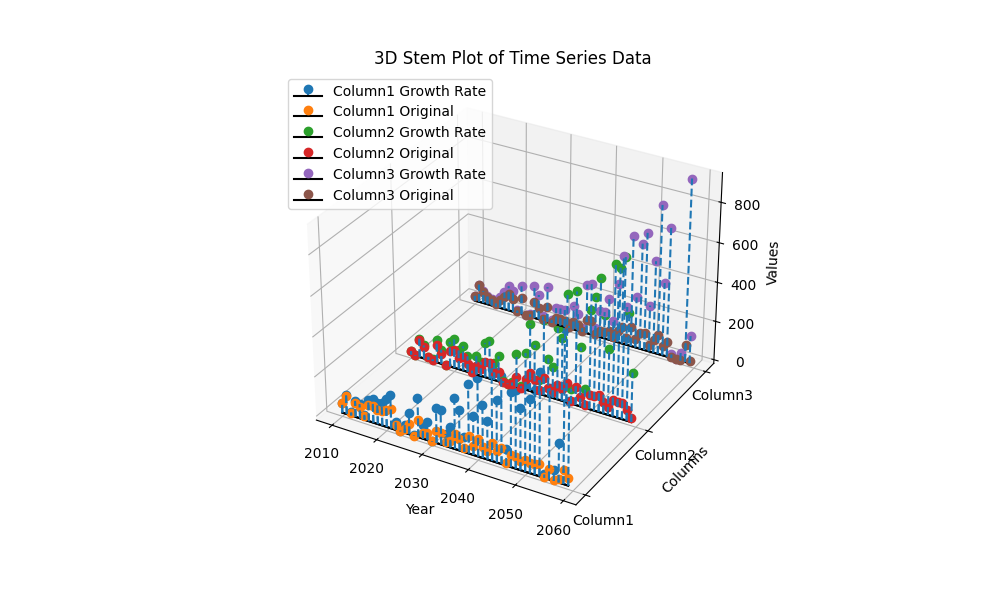

In [217]:
# Generate random data
np.random.seed(42)
data = {'Year': list(range(2010, 2010 + 50)),
        'Column1': np.random.randint(0, 100, size=50),
        'Column2': np.random.randint(0, 100, size=50),
        'Column3': np.random.randint(0, 100, size=50)}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

plotter = InteractivePlotter( dataframe=df)
# plotter.plot_3d_bar(columns_to_include=['Column1', 'Column2'], years_subset=[2010, 2011, 2013, 2014], growth_rate=0.05)
# plotter.plot_3d_line(columns_to_include=['Column1', 'Column2', 'Column3'], add_average=True, scale_factor=None, growth_rate=0.05,  show_original=True, years_subset=None)
plotter.plot_3d_stem(columns_to_include=['Column1', 'Column2', 'Column3'], add_average=False, scale_factor=None, show_original=True, years_subset=None, growth_rate=0.05)

In [224]:

class TimeSeriesPlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def plot_interactive_time_series(
        self, 
        columns_subset=None, 
        years_subset=None, 
        scale_factor=None, 
        growth_rate=None, 
        show_original=False, 
        moving_average_window=None,
        plot_original_moving_average=False, 
        plot_scaled_on_original=False, 
        plot_growth_rate_moving_average=False,
        plot_growth_rate_on_original=False
    ):
        """
        Plot interactive time series with optional scaling, growth rate, and moving average.

        Parameters:
            columns_subset (list, optional): List of columns to be plotted. Default is all columns in the dataframe.
            years_subset (list, optional): List of years to be plotted. Default is all years in the dataframe.
            scale_factor (float, optional): Factor to scale the values by. Default is None.
            growth_rate (float, optional): Compound growth rate to apply to the values. The formula used is:
                new_value = original_value * (1 + growth_rate)^t, where t is the number of periods.
                Default is None.
            show_original (bool, optional): Whether to show the original values. Default is True.
            moving_average_window (int, optional): Window size for calculating the moving average. Default is None.
            plot_original_moving_average (bool, optional): Whether to plot moving average and error bars for the original series. Default is False.
            plot_scaled_moving_average (bool, optional): Whether to plot moving average and error bars for the scaled series. Default is False.
            plot_scaled_on_original (bool, optional): Whether to plot the scaled series on the original plot. Default is False.

        Returns:
            None
        """
        if columns_subset is None:
            columns_subset = self.dataframe.columns

        if years_subset is None:
            years_subset = self.dataframe.index

        fig, axs = plt.subplots(len(columns_subset), 2, figsize=(16, 4 * len(columns_subset)), sharex='col', gridspec_kw={'width_ratios': [3, 1]})

        for i, column in enumerate(columns_subset):
            values = self.dataframe.loc[years_subset, column].values

            # Plot time series on the left plot
            if show_original:
                axs[i, 0].plot(years_subset, values, label=f'Original {column}', linestyle='-')

                # Plot moving average with error bars if specified
                if moving_average_window is not None and plot_original_moving_average:
                    moving_avg = pd.Series(values).rolling(window=moving_average_window, min_periods=1).mean()
                    axs[i, 0].plot(years_subset, moving_avg, label=f'Original Moving Avg {column}', linestyle='--', alpha=0.7)

                    # Calculate standard deviation for error bars
                    std_dev = pd.Series(values).rolling(window=moving_average_window, min_periods=1).std()
                    upper_bound = moving_avg + std_dev
                    lower_bound = moving_avg - std_dev
                    axs[i, 0].fill_between(years_subset, lower_bound, upper_bound, alpha=0.2, label='Original Error Bars')

                axs[i, 0].set_ylabel('Values')
                axs[i, 0].legend()

            # Apply scaling factor if specified
            if scale_factor is not None:
                scaled_values = values * scale_factor

                if plot_scaled_on_original:
                    axs[i, 0].plot(years_subset, scaled_values, label=f'Scaled {column}', linestyle='--', alpha=0.7)

                axs[i, 0].set_ylabel('Values')
                axs[i, 0].legend()

            # Calculate and plot series with new compound growth rate on the left plot
            if growth_rate is not None:
                # Calculate the series under the new compound growth rate
                periods = np.arange(1, len(years_subset) + 1)
                growth_values = values * (1 + growth_rate) ** periods
                #growth_values = values * np.power(1 + growth_rate, periods)

                if plot_growth_rate_on_original:
                    axs[i, 0].plot(years_subset, growth_values, label=f'With Growth Rate {column}', linestyle='--', alpha=0.7)

                # Plot delta on the right plot
                delta = growth_values - values
                axs[i, 1].bar(years_subset, delta, label=f'Delta (Growth Rate {column})', alpha=0.7)

                axs[i, 1].set_ylabel('Delta')
                axs[i, 1].legend()

                # Plot scaled moving average with error bars if specified
                if plot_growth_rate_moving_average and moving_average_window is not None:
                    growth_moving_avg = pd.Series(growth_values).rolling(window=moving_average_window, min_periods=1).mean()
                    axs[i, 0].plot(years_subset, growth_moving_avg, label=f'Growth Moving Avg {column}', linestyle='--', alpha=0.7)

                    # Calculate standard deviation for error bars
                    scaled_std_dev = pd.Series(growth_values).rolling(window=moving_average_window, min_periods=1).std()
                    scaled_upper_bound = growth_moving_avg + scaled_std_dev
                    scaled_lower_bound = growth_moving_avg - scaled_std_dev
                    axs[i, 0].fill_between(years_subset, scaled_lower_bound, scaled_upper_bound, alpha=0.2, label='Growth Error Bars')

            handles, labels = axs[i, 0].get_legend_handles_labels()
            axs[i, 0].legend(handles, labels, loc='best')

        axs[-1, 0].set_xlabel('Year')
        axs[-1, 1].set_xlabel('Year')

        plt.suptitle('Interactive Time Series Subplots')

        # Adjust layout to ensure the legend is visible
        plt.tight_layout()

        plt.show()


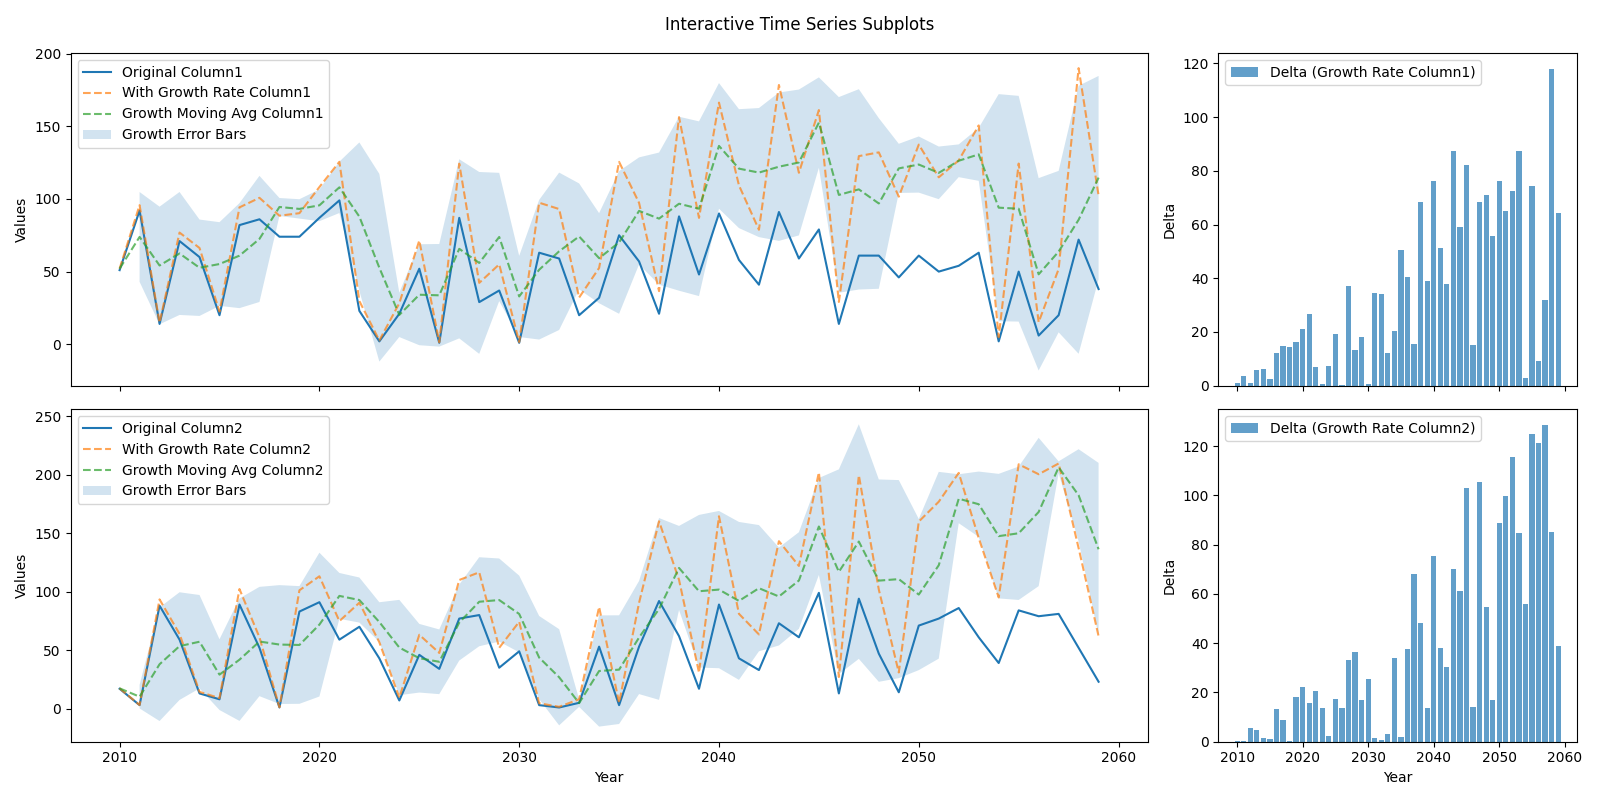

In [225]:
# Example usage:

# Generate random data
np.random.seed(42)
data = {'Year': list(range(2010, 2010 + 50)),
        'Column1': np.random.randint(0, 100, size=50),
        'Column2': np.random.randint(0, 100, size=50),
        'Column3': np.random.randint(0, 100, size=50)}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

ts_plotter = TimeSeriesPlotter(df)
ts_plotter.plot_interactive_time_series(
    columns_subset=['Column1', 'Column2'],
    years_subset = None,
    scale_factor=None,
    show_original = True,
    growth_rate = 0.02,
    moving_average_window=3, 
    plot_original_moving_average=False,
    plot_scaled_on_original = False,
    plot_growth_rate_moving_average=True, 
    plot_growth_rate_on_original=True
)
